In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
data_path = 'data'
files = os.listdir(data_path)

# Lista para guardar los DataFrames
dfs = []

# Crear figura para los plots
plt.figure(figsize=(12, 6))

# Leer y plotear cada archivo
for file in files:
    if file.startswith('data') and file.endswith('.csv'):
        file_path = os.path.join(data_path, file)
        df = pd.read_csv(file_path)

        # Guardar el DataFrame en la lista
        dfs.append(df)

# Concatenar todos los DataFrames
df_total = pd.concat(dfs, ignore_index=True)

df_total


,FECHA,NRO_CAJERO,DISPENSADO,REMANENTE
0,2021-01-01,0,1500900,9494700
1,2021-01-01,1,842300,7954200
2,2021-01-01,2,4134300,7960800
3,2021-01-01,3,657500,34528300
4,2021-01-01,4,16728700,18457200
...,...,...,...,...
78499,2022-12-31,103,110571500,21375400
78500,2022-12-31,104,9041600,48135300
78501,2022-12-31,105,29523200,27653800
78502,2022-12-31,106,19791000,37386000


<Figure size 1200x600 with 0 Axes>

In [5]:
df_total['FECHA'] = pd.to_datetime(df_total['FECHA'])

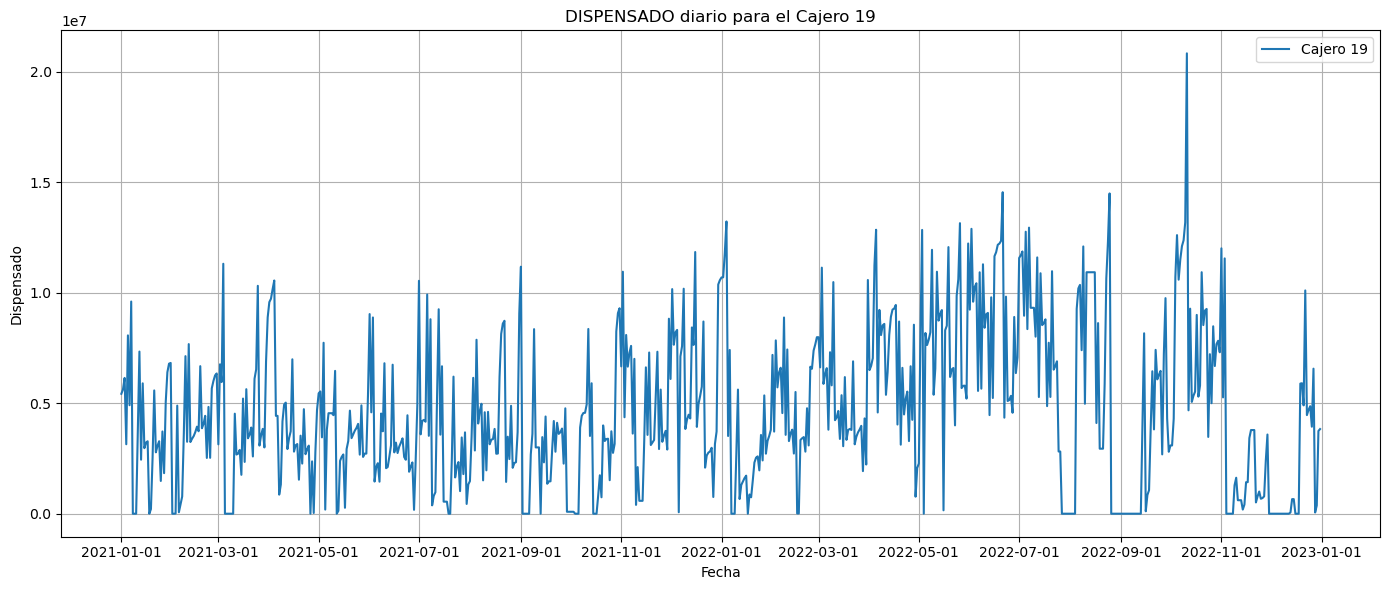

In [32]:
n = 19  # por ejemplo

# Filtrar por cajero n
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n]

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(df_cajero_n['FECHA'], df_cajero_n['DISPENSADO'], label=f'Cajero {n}')


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'DISPENSADO diario para el Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel('Dispensado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

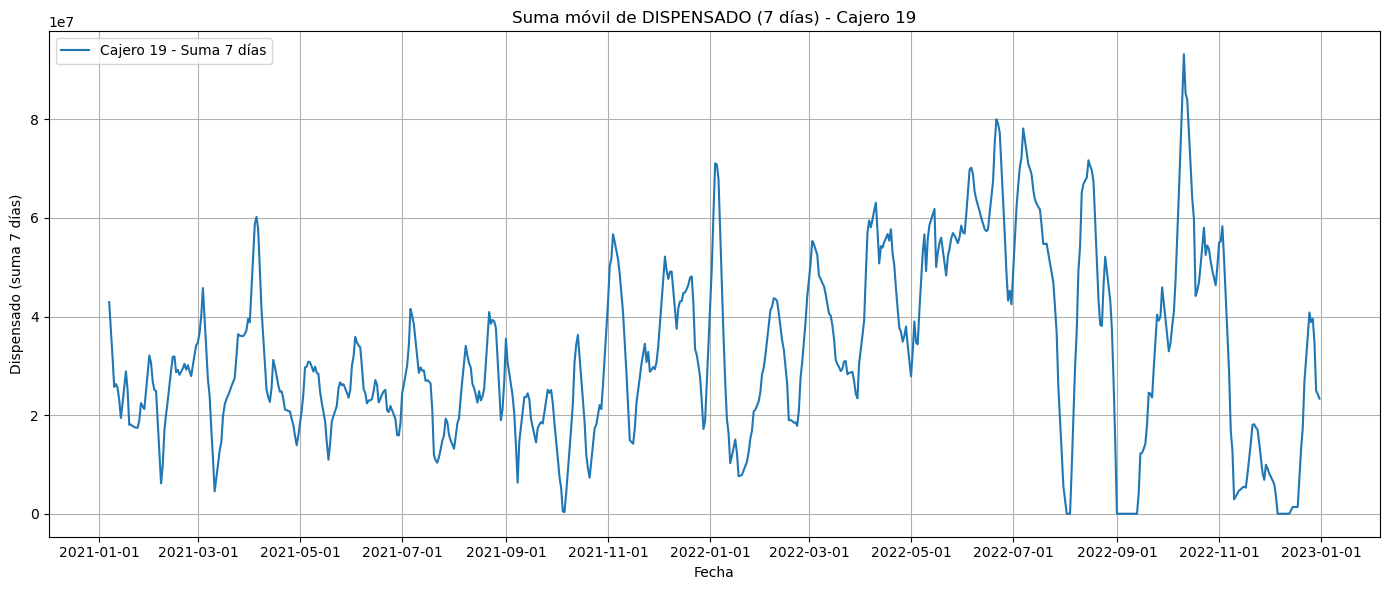

In [31]:
n= 19
 
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

# Asegúrate de que la columna 'FECHA' sea de tipo datetime
df_cajero_n['FECHA'] = pd.to_datetime(df_cajero_n['FECHA'])

DIAS = 7
# Aplicar suma de ventana deslizante de 5 días
# Primero agrupar por fecha si hay múltiples entradas por fecha (opcional según tu estructura)
serie_rolling = df_cajero_n.set_index('FECHA')['DISPENSADO'].rolling(window=DIAS).sum()

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(serie_rolling.index, serie_rolling.values, label=f'Cajero {n} - Suma {DIAS} días')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'Suma móvil de DISPENSADO ({DIAS} días) - Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel(f'Dispensado (suma {DIAS} días)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Variables:
- Interpolacion de data en cajeros que faltan.
- Dia de la semana(one hot enconding)
- Separar fecha en (año, mes, dia)
- Inflacion mensual (se usa la del mes anterior)
- Dias imporantes (navidad, reyes, dia del ñino/madre/padre)
- Media dispensado ultimos dias 3,7,15,30 para predecir dia i+1.

----------
- Clustering de cajeros (NACHO)


Modelo:
- LSTM
- Transformers
- Transfomers finetuneado a nuestra data.
- Ecuaciones diferenciales ¿?

Busco dias faltantes.


In [33]:
n = 19  # cambiar por el cajero que quieras

# Filtrar datos del cajero y ordenar por fecha
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

# Crear rango completo de fechas desde la primera hasta la última
rango_fechas = pd.date_range(start=df_cajero_n['FECHA'].min(),
                              end=df_cajero_n['FECHA'].max(),
                              freq='D')

# Obtener las fechas existentes en el DataFrame
fechas_existentes = pd.to_datetime(df_cajero_n['FECHA'].unique())

# Encontrar las fechas faltantes
fechas_faltantes = sorted(set(rango_fechas) - set(fechas_existentes))

# Mostrar fechas faltantes
print(f"Días faltantes para el cajero {n}:")
for fecha in fechas_faltantes:
    print(fecha.date())


Días faltantes para el cajero 19:
2021-11-22


In [34]:
# Mostrar el DataFrame total los dias entre 20 de noviembre de 2021 y 30 de noviembre de 2021 para el cajero 3
df_total[(df_total['NRO_CAJERO'] == n) & 
          (df_total['FECHA'] >= '2021-11-15') & 
          (df_total['FECHA'] <= '2021-12-30')].sort_values('FECHA')

,FECHA,NRO_CAJERO,DISPENSADO,REMANENTE
34278,2021-11-15,19,3311900,14281000
34386,2021-11-16,19,6623700,10969200
34494,2021-11-17,19,3567000,14025900
34601,2021-11-18,19,7295600,10297400
34709,2021-11-19,19,3108500,14484500
34817,2021-11-20,19,3220600,14372400
34925,2021-11-21,19,3338300,14254700
35033,2021-11-23,19,7330800,10262200
35140,2021-11-24,19,2927000,14665900
35247,2021-11-25,19,5617700,11975300


In [ ]:
# Filtrar y ordenar
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')
rango_fechas = pd.date_range(start=df_cajero_n['FECHA'].min(), end=df_cajero_n['FECHA'].max(), freq='D')
df_completo = pd.DataFrame({'FECHA': rango_fechas})

# Merge para tener NaNs en días faltantes
df_merge = df_completo.merge(df_cajero_n[['FECHA', 'DISPENSADO', 'REMANENTE']], on='FECHA', how='left')

# Inicializar columnas interpoladas
df_merge['REMANENTE_interp'] = df_merge['REMANENTE']
df_merge['DISPENSADO_interp'] = df_merge['DISPENSADO']

# Índices de días con datos
idx_known = df_merge[df_merge['REMANENTE'].notna()].index

# Recorrer pares de días conocidos consecutivos
for i in range(len(idx_known) - 1):
    idx_start = idx_known[i]
    idx_end = idx_known[i+1]
    
    rem_start = df_merge.at[idx_start, 'REMANENTE']
    rem_end = df_merge.at[idx_end, 'REMANENTE']
    
    # Días faltantes entre idx_start y idx_end
    gap_idx = list(range(idx_start + 1, idx_end))

    if not gap_idx:
        continue  # nada que interpolar
    
    if rem_end < rem_start:
        df_merge.loc[gap_idx, 'REMANENTE_interp'] = df_merge['REMANENTE_interp'].interpolate(method='linear').loc[gap_idx]
        
        for j in gap_idx:
            rem_anterior = df_merge.loc[j - 1, 'REMANENTE_interp']
            rem_actual = df_merge.loc[j, 'REMANENTE_interp']
            df_merge.loc[j, 'DISPENSADO_interp'] = rem_anterior - rem_actual
    else:
        # Caso especial: no interpolar, repetir valor anterior y poner DISPENSADO=0
        df_merge.loc[gap_idx, 'REMANENTE_interp'] = rem_start
        df_merge.loc[gap_idx, 'DISPENSADO_interp'] = 0

# Asegurar que el primer DISPENSADO no sea NaN
df_merge['DISPENSADO_interp'] = df_merge['DISPENSADO_interp'].fillna(0)

# Resultado final
df_resultado = df_merge[['FECHA', 'DISPENSADO_interp', 'REMANENTE_interp']].rename(
    columns={'DISPENSADO_interp': 'DISPENSADO', 'REMANENTE_interp': 'REMANENTE'}
)
df_resultado['NRO_CAJERO'] = n

# Mostrar un intervalo específico
df_resultado[(df_resultado['FECHA'] >= '2021-11-15') & 
            (df_resultado['FECHA'] <= '2021-11-30')]


,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO
318,2021-11-15,16338300.0,16504300.0,18
319,2021-11-16,18000900.0,14841900.0,18
320,2021-11-17,19298300.0,13544400.0,18
321,2021-11-18,0.0,13544400.0,18
322,2021-11-19,115500.0,28473000.0,18
323,2021-11-20,115500.0,28473000.0,18
324,2021-11-21,170400.0,28418000.0,18
325,2021-11-22,304550.0,28113450.0,18
326,2021-11-23,779600.0,27808900.0,18
327,2021-11-24,2196900.0,26536700.0,18


Agrego one-hot enconding.

In [11]:
dia_de_la_semana = df_resultado['FECHA'].dt.day_name()

# Realizar el one-hot encoding
dias_one_hot = pd.get_dummies(dia_de_la_semana, prefix='DIA')

dias_one_hot = dias_one_hot.astype(int)

# Concatenar las columnas de one-hot encoding al DataFrame original
df_resultado = pd.concat([df_resultado, dias_one_hot], axis=1)

# Mostrar el DataFrame actualizado
df_resultado.head(10)

,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday
0,2021-01-01,475000.0,8321500.0,18,1,0,0,0,0,0,0
1,2021-01-02,519000.0,8277500.0,18,0,0,1,0,0,0,0
2,2021-01-03,612500.0,8184000.0,18,0,0,0,1,0,0,0
3,2021-01-04,672900.0,8123500.0,18,0,1,0,0,0,0,0
4,2021-01-05,1024800.0,7771700.0,18,0,0,0,0,0,1,0
5,2021-01-06,1401900.0,7394500.0,18,0,0,0,0,0,0,1
6,2021-01-07,1880200.0,6916200.0,18,0,0,0,0,1,0,0
7,2021-01-08,2074900.0,6721600.0,18,1,0,0,0,0,0,0
8,2021-01-09,2146300.0,6650100.0,18,0,0,1,0,0,0,0
9,2021-01-10,2146300.0,6650100.0,18,0,0,0,1,0,0,0


Separar dia, mes y año.

In [12]:
df_resultado['AÑO'] = df_resultado['FECHA'].dt.year
df_resultado['MES'] = df_resultado['FECHA'].dt.month
df_resultado['DIA'] = df_resultado['FECHA'].dt.day

# Mostrar el DataFrame actualizado
df_resultado.head()

,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA
0,2021-01-01,475000.0,8321500.0,18,1,0,0,0,0,0,0,2021,1,1
1,2021-01-02,519000.0,8277500.0,18,0,0,1,0,0,0,0,2021,1,2
2,2021-01-03,612500.0,8184000.0,18,0,0,0,1,0,0,0,2021,1,3
3,2021-01-04,672900.0,8123500.0,18,0,1,0,0,0,0,0,2021,1,4
4,2021-01-05,1024800.0,7771700.0,18,0,0,0,0,0,1,0,2021,1,5


Inflacion mensual.

In [13]:
# Leer el archivo de inflación
inflacion_path = 'data/inflation.csv'
df_inflacion = pd.read_csv(inflacion_path)

# Crear un diccionario para acceder rápidamente a la inflación por año y mes
inflacion_dict = {(row['año'], row['mes']): row['inflacion'] for _, row in df_inflacion.iterrows()}

# Función para obtener la inflación del mes anterior
def obtener_inflacion_anterior(fecha):
    año = fecha.year
    mes = fecha.month
    
    if mes == 1:  # Si es enero, tomar diciembre del año anterior
        mes_anterior = 12
        año_anterior = año - 1
    else:  # Para otros meses, tomar el mes anterior del mismo año
        mes_anterior = mes - 1
        año_anterior = año
    
    return inflacion_dict.get((año_anterior, mes_anterior), None)

# Aplicar la función para calcular la inflación del mes anterior
df_resultado['INFLACION_MES_ANTERIOR'] = df_resultado['FECHA'].apply(obtener_inflacion_anterior)

# Mostrar el DataFrame actualizado
df_resultado[(df_resultado['FECHA'] >= '2021-12-25') & 
            (df_resultado['FECHA'] <= '2022-01-05')]


,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR
358,2021-12-25,8940500.0,30643500.0,18,0,0,1,0,0,0,0,2021,12,25,3.7
359,2021-12-26,8940500.0,30643500.0,18,0,0,0,1,0,0,0,2021,12,26,3.7
360,2021-12-27,9643100.0,29941000.0,18,0,1,0,0,0,0,0,2021,12,27,3.7
361,2021-12-28,11336500.0,28247600.0,18,0,0,0,0,0,1,0,2021,12,28,3.7
362,2021-12-29,14057900.0,25526300.0,18,0,0,0,0,0,0,1,2021,12,29,3.7
363,2021-12-30,15579600.0,24004400.0,18,0,0,0,0,1,0,0,2021,12,30,3.7
364,2021-12-31,15579600.0,24004400.0,18,1,0,0,0,0,0,0,2021,12,31,3.7
365,2022-01-01,15579600.0,24004400.0,18,0,0,1,0,0,0,0,2022,1,1,3.8
366,2022-01-02,15579600.0,24004400.0,18,0,0,0,1,0,0,0,2022,1,2,3.8
367,2022-01-03,15938000.0,23645900.0,18,0,1,0,0,0,0,0,2022,1,3,3.8


Media 3, 7, 15 y 30 dias.

In [14]:
df_resultado['MEDIA_3_DIAS'] = df_resultado['DISPENSADO'].rolling(window=3, min_periods=1).mean()
df_resultado['MEDIA_7_DIAS'] = df_resultado['DISPENSADO'].rolling(window=7, min_periods=1).mean()
df_resultado['MEDIA_15_DIAS'] = df_resultado['DISPENSADO'].rolling(window=15, min_periods=1).mean()
df_resultado['MEDIA_30_DIAS'] = df_resultado['DISPENSADO'].rolling(window=30, min_periods=1).mean()

# Mostrar el DataFrame actualizado
df_resultado.head(10)

,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS
0,2021-01-01,475000.0,8321500.0,18,1,0,0,0,0,0,0,2021,1,1,4.0,4.750000e+05,4.750000e+05,4.750000e+05,4.750000e+05
1,2021-01-02,519000.0,8277500.0,18,0,0,1,0,0,0,0,2021,1,2,4.0,4.970000e+05,4.970000e+05,4.970000e+05,4.970000e+05
2,2021-01-03,612500.0,8184000.0,18,0,0,0,1,0,0,0,2021,1,3,4.0,5.355000e+05,5.355000e+05,5.355000e+05,5.355000e+05
3,2021-01-04,672900.0,8123500.0,18,0,1,0,0,0,0,0,2021,1,4,4.0,6.014667e+05,5.698500e+05,5.698500e+05,5.698500e+05
4,2021-01-05,1024800.0,7771700.0,18,0,0,0,0,0,1,0,2021,1,5,4.0,7.700667e+05,6.608400e+05,6.608400e+05,6.608400e+05
5,2021-01-06,1401900.0,7394500.0,18,0,0,0,0,0,0,1,2021,1,6,4.0,1.033200e+06,7.843500e+05,7.843500e+05,7.843500e+05
6,2021-01-07,1880200.0,6916200.0,18,0,0,0,0,1,0,0,2021,1,7,4.0,1.435633e+06,9.409000e+05,9.409000e+05,9.409000e+05
7,2021-01-08,2074900.0,6721600.0,18,1,0,0,0,0,0,0,2021,1,8,4.0,1.785667e+06,1.169457e+06,1.082650e+06,1.082650e+06
8,2021-01-09,2146300.0,6650100.0,18,0,0,1,0,0,0,0,2021,1,9,4.0,2.033800e+06,1.401929e+06,1.200833e+06,1.200833e+06
9,2021-01-10,2146300.0,6650100.0,18,0,0,0,1,0,0,0,2021,1,10,4.0,2.122500e+06,1.621043e+06,1.295380e+06,1.295380e+06


Agregar dias importantes.

In [19]:
# Leer el archivo de días importantes
dias_importantes_path = 'data/dias_importantes.csv'
df_dias_importantes = pd.read_csv(dias_importantes_path)

# Crear una columna de fecha en el DataFrame de días importantes
df_dias_importantes['FECHA'] = pd.to_datetime(
    dict(year=df_dias_importantes['año'], 
         month=df_dias_importantes['mes'], 
         day=df_dias_importantes['día'])
)

# Crear un conjunto de fechas importantes para rápida comparación
fechas_importantes = set(df_dias_importantes['FECHA'])

# Agregar columna al df_resultado indicando si el día es importante
df_resultado['ES_DIA_IMPORTANTE'] = df_resultado['FECHA'].apply(lambda x: 1 if x in fechas_importantes else 0)


df_resultado[(df_resultado['FECHA'] >= '2021-12-25') & 
            (df_resultado['FECHA'] <= '2022-01-03')]

,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS,ES_DIA_IMPORTANTE
358,2021-12-25,8940500.0,30643500.0,18,0,0,1,0,0,0,0,2021,12,25,3.7,8.928033e+06,1.040009e+07,1.322993e+07,1.061877e+07,1
359,2021-12-26,8940500.0,30643500.0,18,0,0,0,1,0,0,0,2021,12,26,3.7,8.940500e+06,9.029100e+06,1.293481e+07,1.081684e+07,0
360,2021-12-27,9643100.0,29941000.0,18,0,1,0,0,0,0,0,2021,12,27,3.7,9.174700e+06,7.653871e+06,1.268653e+07,1.103778e+07,0
361,2021-12-28,11336500.0,28247600.0,18,0,0,0,0,0,1,0,2021,12,28,3.7,9.973367e+06,8.943186e+06,1.255099e+07,1.131517e+07,0
362,2021-12-29,14057900.0,25526300.0,18,0,0,0,0,0,0,1,2021,12,29,3.7,1.167917e+07,1.010887e+07,1.246341e+07,1.168166e+07,0
363,2021-12-30,15579600.0,24004400.0,18,0,0,0,0,1,0,0,2021,12,30,3.7,1.365800e+07,1.106266e+07,1.240909e+07,1.205085e+07,0
364,2021-12-31,15579600.0,24004400.0,18,1,0,0,0,0,0,0,2021,12,31,3.7,1.507237e+07,1.201110e+07,1.232472e+07,1.234241e+07,0
365,2022-01-01,15579600.0,24004400.0,18,0,0,1,0,0,0,0,2022,1,1,3.8,1.557960e+07,1.295954e+07,1.213699e+07,1.262481e+07,1
366,2022-01-02,15579600.0,24004400.0,18,0,0,0,1,0,0,0,2022,1,2,3.8,1.557960e+07,1.390799e+07,1.193980e+07,1.284069e+07,0
367,2022-01-03,15938000.0,23645900.0,18,0,1,0,0,0,0,0,2022,1,3,3.8,1.569907e+07,1.480726e+07,1.176651e+07,1.306412e+07,0


Valor a predecir de decidio que sea la suma de los ultimos 7 dias de los dispensado, luego para saber el valor de mañana se restara lo dispensado de los ultimos 6 dias.

In [21]:
df_resultado['TARGET'] = df_resultado['DISPENSADO'].rolling(window=7, min_periods=1).sum()

df_resultado.head(10)

,FECHA,DISPENSADO,REMANENTE,NRO_CAJERO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,...,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS,ES_DIA_IMPORTANTE,TARGET
0,2021-01-01,475000.0,8321500.0,18,1,0,0,0,0,0,...,2021,1,1,4.0,4.750000e+05,4.750000e+05,4.750000e+05,4.750000e+05,1,475000.0
1,2021-01-02,519000.0,8277500.0,18,0,0,1,0,0,0,...,2021,1,2,4.0,4.970000e+05,4.970000e+05,4.970000e+05,4.970000e+05,0,994000.0
2,2021-01-03,612500.0,8184000.0,18,0,0,0,1,0,0,...,2021,1,3,4.0,5.355000e+05,5.355000e+05,5.355000e+05,5.355000e+05,0,1606500.0
3,2021-01-04,672900.0,8123500.0,18,0,1,0,0,0,0,...,2021,1,4,4.0,6.014667e+05,5.698500e+05,5.698500e+05,5.698500e+05,0,2279400.0
4,2021-01-05,1024800.0,7771700.0,18,0,0,0,0,0,1,...,2021,1,5,4.0,7.700667e+05,6.608400e+05,6.608400e+05,6.608400e+05,0,3304200.0
5,2021-01-06,1401900.0,7394500.0,18,0,0,0,0,0,0,...,2021,1,6,4.0,1.033200e+06,7.843500e+05,7.843500e+05,7.843500e+05,1,4706100.0
6,2021-01-07,1880200.0,6916200.0,18,0,0,0,0,1,0,...,2021,1,7,4.0,1.435633e+06,9.409000e+05,9.409000e+05,9.409000e+05,0,6586300.0
7,2021-01-08,2074900.0,6721600.0,18,1,0,0,0,0,0,...,2021,1,8,4.0,1.785667e+06,1.169457e+06,1.082650e+06,1.082650e+06,0,8186200.0
8,2021-01-09,2146300.0,6650100.0,18,0,0,1,0,0,0,...,2021,1,9,4.0,2.033800e+06,1.401929e+06,1.200833e+06,1.200833e+06,0,9813500.0
9,2021-01-10,2146300.0,6650100.0,18,0,0,0,1,0,0,...,2021,1,10,4.0,2.122500e+06,1.621043e+06,1.295380e+06,1.295380e+06,0,11347300.0
